In [0]:
!pip install colorama

In [0]:
from colorama import Fore, Style
print(Fore.BLUE + "hahdahsd")
print(Style.DIM +"asdasd")

hahdahsd
asdasd


In [0]:
!pip install bashplotlib

In [0]:
from bashplotlib.scatterplot import plot_scatter
plot_scatter([12,23,43,12],[23,12,22,34],)

In [0]:
import numpy as np
a = np.array([[1, 2], [3, 4]])

In [7]:
list(a[0])[]

2

In [0]:
lis[lis.index(max(lis))] +=10 
lis

[2, 3, 4, 5, 2, 1, 4, 76, 7, 8, 6]

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re  
import nltk  
from sklearn.datasets import load_files  
nltk.download('stopwords')  
import pickle  
from nltk.corpus import stopwords  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
data = pd.read_csv(r'ISEAR.csv',names=['index','text','text1'])
data.rename(columns={'index':'emo'},inplace=True)

In [0]:
nltk.download('wordnet')  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()
for sen in range(0, len(data['text'])):  
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(data['text'][sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    data['text1'][sen]=document

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['emo1']=labelencoder.fit_transform(data['emo'])

In [0]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
c = vectorizer.fit_transform(data['text1']).toarray()  

from sklearn.feature_extraction.text import TfidfTransformer  
tfidfconverter = TfidfTransformer()  
X = tfidfconverter.fit_transform(c).toarray()  

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, data['emo'], test_size=0.2, random_state=0)  

In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)  
classifier.fit(X_train, y_train)  


# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train,y_train)


# from sklearn.naive_bayes import MultinomialNB
# classifier = MultinomialNB()
# classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)  

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[100  26  26  25  20  11  21]
 [ 24 112  18  11  19  10  15]
 [ 10  13 135   8   5  13  11]
 [ 34  20  19  92  18  16  26]
 [  8   8  10   5 177  13   7]
 [ 15  15  13   9  21 121  10]
 [ 20  25  23  31  15   8  92]]
              precision    recall  f1-score   support

       anger       0.47      0.44      0.45       229
     disgust       0.51      0.54      0.52       209
        fear       0.55      0.69      0.62       195
       guilt       0.51      0.41      0.45       225
         joy       0.64      0.78      0.70       228
     sadness       0.63      0.59      0.61       204
       shame       0.51      0.43      0.46       214

   micro avg       0.55      0.55      0.55      1504
   macro avg       0.55      0.55      0.55      1504
weighted avg       0.55      0.55      0.55      1504

0.5511968085106383


In [0]:
y_pred

array(['fear', 'anger', 'anger', ..., 'disgust', 'anger', 'joy'],
      dtype=object)

In [0]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test.values, y_pred)
metrics.auc(fpr, tpr)


ValueError: ignored

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['emo'], test_size=0.2, random_state=0)  

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

# %%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5631648936170213
              precision    recall  f1-score   support

       anger       0.48      0.42      0.45       229
     disgust       0.71      0.53      0.61       209
        fear       0.59      0.69      0.64       195
       guilt       0.44      0.48      0.46       225
         joy       0.74      0.74      0.74       228
     sadness       0.54      0.62      0.57       204
       shame       0.48      0.48      0.48       214

   micro avg       0.56      0.56      0.56      1504
   macro avg       0.57      0.57      0.56      1504
weighted avg       0.57      0.56      0.56      1504



In [0]:
from sklearn.naive_bayes import GaussianNB

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier(n_estimators=100, random_state=10) ),
              ])
nb.fit(X_train, y_train)

# %%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5492021276595744
              precision    recall  f1-score   support

       anger       0.52      0.47      0.49       229
     disgust       0.52      0.55      0.53       209
        fear       0.60      0.70      0.65       195
       guilt       0.46      0.43      0.45       225
         joy       0.63      0.70      0.66       228
     sadness       0.58      0.56      0.57       204
       shame       0.50      0.45      0.47       214

   micro avg       0.55      0.55      0.55      1504
   macro avg       0.55      0.55      0.55      1504
weighted avg       0.55      0.55      0.55      1504



In [0]:
nb.predict([''])

array(['sadness'], dtype=object)

In [0]:
from sklearn.linear_model import SGDClassifier

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None) ),
              ])
nb.fit(X_train, y_train)

# %%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.589095744680851
              precision    recall  f1-score   support

       anger       0.56      0.39      0.46       229
     disgust       0.55      0.63      0.59       209
        fear       0.57      0.79      0.67       195
       guilt       0.56      0.44      0.49       225
        guit       0.00      0.00      0.00         0
         joy       0.71      0.79      0.75       228
     sadness       0.60      0.64      0.62       204
       shame       0.55      0.47      0.51       214

   micro avg       0.59      0.59      0.59      1504
   macro avg       0.51      0.52      0.51      1504
weighted avg       0.59      0.59      0.58      1504



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
from sklearn.linear_model import LogisticRegression

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(n_jobs=1, C=1e5) ),
              ])
nb.fit(X_train, y_train)

# %%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.5053191489361702
              precision    recall  f1-score   support

       anger       0.34      0.32      0.33       229
     disgust       0.52      0.53      0.52       209
        fear       0.61      0.65      0.63       195
       guilt       0.42      0.38      0.40       225
         joy       0.72      0.69      0.70       228
     sadness       0.50      0.56      0.53       204
       shame       0.42      0.43      0.43       214

   micro avg       0.51      0.51      0.51      1504
   macro avg       0.51      0.51      0.51      1504
weighted avg       0.50      0.51      0.50      1504



In [0]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(nb) 

In [0]:
from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
from_pickle.predict(['hai']) 

array(['joy'], dtype=object)

In [0]:
with open('emotion_ISEAR_pickle.pickle', 'wb') as f:
    pickle.dump(nb, f)

In [0]:
with open('mypickle.pickle', 'rb') as f:
    loaded_obj = pickle.load(f)

In [0]:
loaded_obj.predict(['hai'])[0]

'joy'

In [0]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
c = vectorizer.fit_transform(data['text1']).toarray()  

from sklearn.feature_extraction.text import TfidfTransformer  
tfidfconverter = TfidfTransformer()  
X = tfidfconverter.fit_transform(c).toarray()  

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, data['emo1'], test_size=0.2, random_state=0)  

In [0]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 1500
# X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
# X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# # create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=500)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/3
6012/6012 [==============================] - 30s 5ms/step - loss: -0.0570 - acc: 0.1425
Epoch 2/3
6012/6012 [==============================] - 29s 5ms/step - loss: -16.0262 - acc: 0.1425
Epoch 3/3
6012/6012 [==============================] - 27s 5ms/step - loss: -30.3564 - acc: 0.1425
Accuracy: 13.90%


In [0]:
model.predict(['hai hello'])

AttributeError: ignored

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils import to_categorical
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
# from lib.get_top_xwords import filter_to_top_x

# df = pd.read_csv('data/wine_data.csv')

# counter = Counter(df['variety'].tolist())
# top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
# df = df[df['variety'].map(lambda x: x in top_10_varieties)]

# description_list = df['description'].tolist()
# mapped_list, word_list = filter_to_top_x(description_list, 2500, 10)
# varietal_list_o = [top_10_varieties[i] for i in df['variety'].tolist()]
# varietal_list = to_categorical(varietal_list_o)

max_review_length = 1500

# mapped_list = sequence.pad_sequences(mapped_list, maxlen=max_review_length)
# train_x, test_x, train_y, test_y = train_test_split(mapped_list, varietal_list, test_size=0.3)

max_review_length = 1500

embedding_vector_length = 64
model = Sequential()

model.add(Embedding(1500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, batch_size=64)

y_score = model.predict(X_test)
y_score = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score]
n_right = 0
for i in range(len(y_score)):
    if all(y_score[i][j] == y_test[i][j] for j in range(len(y_score[i]))):
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(y_test)) * 100)))

ValueError: ignored

Automatically created module for IPython interactive environment


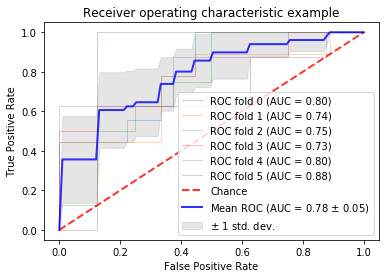

In [0]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [0]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = HashingVectorizer(n_features=2**4)
X = vectorizer.fit_transform(corpus)
print(X.shape)

(4, 16)


<1x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>